<a href="https://colab.research.google.com/github/Swethaa-sri/clustering/blob/main/customer_personality_analysis_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###### **Importing Dataset**

In [ ]:
url = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/marketing_campaign.csv'
data = pd.read_csv(url, delimiter = ';' )
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

###### ***check for null values ***

In [ ]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

##### There are 24 null values in Income column ==> we will drop null values

In [ ]:
data = data.dropna()
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

##### no null values

In [ ]:
## dropping ID as it is unique for each row, Z_CostContact and Z_Revenue no information regarding these variables
data = data.drop(['ID','Z_CostContact','Z_Revenue'],axis=1)
data.head()

In [ ]:
## with Year_Birth and Dt_Customer creating a new feature Age_at_customer_enrolled
from datetime import date
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

data['Age_at_Customer_enrolled'] = data['Dt_Customer'].dt.year - data['Year_Birth']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fa879ec10>]],
      dtype=object)

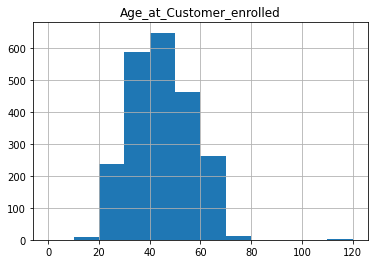

In [ ]:
## distribution of Age_at_Customer_enrolled
data.hist(column='Age_at_Customer_enrolled', bins=range(0,130,10))

##### Above 600 customers enrolled at age of 40-50  
##### About 580 customers enrolled at age of 30-40
##### About 470 customers enrolled at age of 50-60
##### About 220 customers enrolled at age of 20-30
##### About 260 customers enrolled at age of 60-70
##### A very less customers enrolled at age of 10-20 and 70-80
##### Customers above the age of 100 have also enrolled we can consider that as outlier. 

In [ ]:
## removing customers enrolled at age above 100
data = data[data['Age_at_Customer_enrolled']<100]

In [ ]:
## Education
data.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

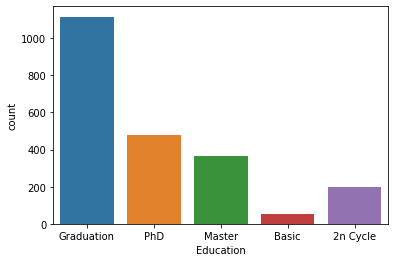

In [ ]:
sns.countplot(x='Education',data=data)

###### Almost above 1000 customers are Graduated
###### Very few customers are with basic education

In [ ]:
## combining Phd and Master as Master, Basic and 2n Cycle as Undergraduate
data['Education']=data['Education'].replace({'PhD':'Master','Basic':'Undergraduate','2n Cycle':'Undergraduate'})
data['Education'].unique()

array(['Graduation', 'Master', 'Undergraduate'], dtype=object)

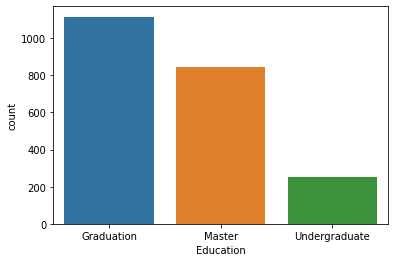

In [ ]:
sns.countplot(x='Education',data=data)

In [ ]:
#### Label encoding of Education
data['Education'] = data['Education'].replace({'Graduation':2,'Master':1,'Undergraduate':0})


In [ ]:
data['Education'].unique()

array([2, 1, 0])

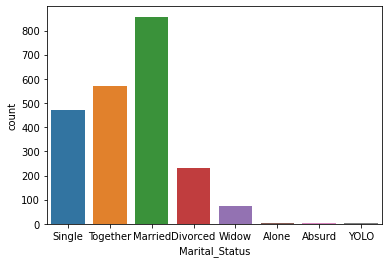

In [ ]:
## Distribution of Marital_Status
sns.countplot(x='Marital_Status',data=data)

##### Majority are married

In [ ]:
## labelling Married and Together as partner and remaining as Single
data['Marital_Status'] = data['Marital_Status'].replace({'Together':'Partner','Married':'Partner','Divorced':'Single','Widow':'Single',
                                                         'Alone':'Single','Absurd':'Single','YOLO':'Single'})

In [ ]:
data.Marital_Status.unique()

array(['Single', 'Partner'], dtype=object)

In [ ]:
data['Marital_Status'] = data['Marital_Status'].replace({'Single':1,'Partner':2})

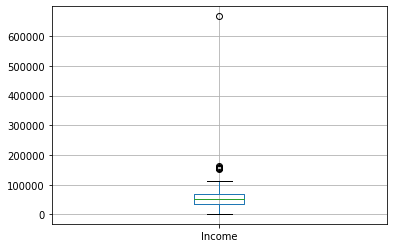

In [ ]:
## Income distribution
data.boxplot(column='Income')

##### outliers are present. We will delete extreme outlier ==> income above 6,00,000

In [ ]:
data = data[data['Income']<600000]

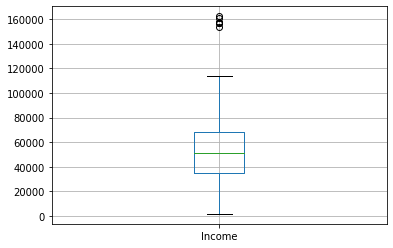

In [ ]:
data.boxplot(column='Income')

##### median income ==> 50000

In [ ]:
data.Kidhome.unique()

array([0, 1, 2])

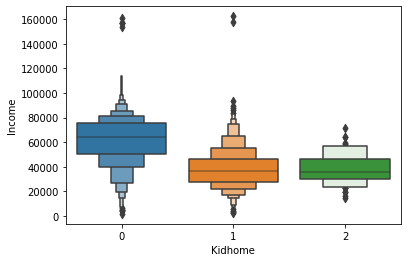

In [ ]:
sns.boxenplot(y=data["Income"],x=data["Kidhome"])

##### with 2 kids at home have a median income of 40,000
##### with 1 kid at home have a median income of 40,000
##### with 0 kid at home have a median income of 65,000

In [ ]:
## Teenhome
data.Teenhome.unique()

array([0, 1, 2])

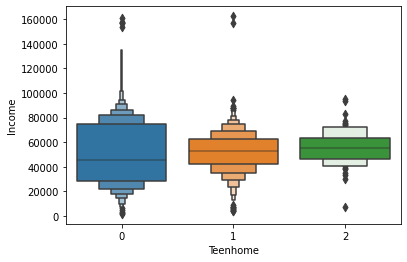

In [ ]:
sns.boxenplot(y=data["Income"],x=data["Teenhome"])

##### with 2 teens have a median salary of 60,000 
##### with 1 teen have a median salary of 58,000
##### with 0 teen have a median salary of 48,000 


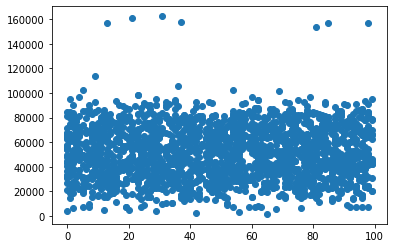

In [ ]:
## Recency
plt.scatter(x=data['Recency'],y=data['Income'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fa55eb050>]],
      dtype=object)

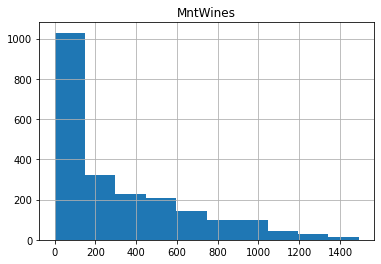

In [ ]:
##MntWines
data.hist(column='MntWines')

###### spending upto 200 is more on wines

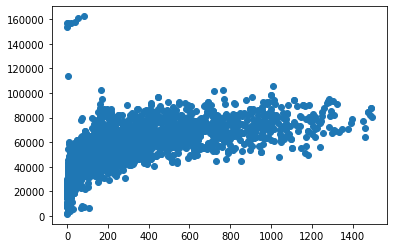

In [ ]:
plt.scatter(data['MntWines'],data['Income'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fa54f3c50>]],
      dtype=object)

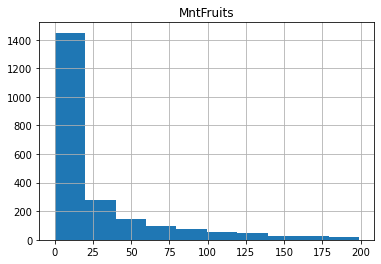

In [ ]:
##MntFruits
data.hist(column='MntFruits')

#### spending on fruits is upto 25

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fa548ff50>]],
      dtype=object)

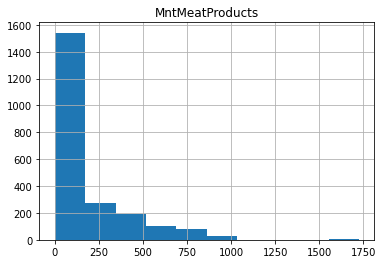

In [ ]:
##MntMeatProducts
data.hist(column='MntMeatProducts')

#### spending on meat upto 200 is more

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fa53adbd0>]],
      dtype=object)

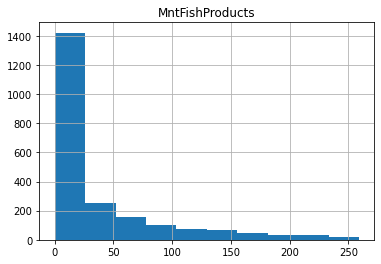

In [ ]:
##MntFishProducts
data.hist(column='MntFishProducts')

##### spending on fish upto 25

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fa53d9110>]],
      dtype=object)

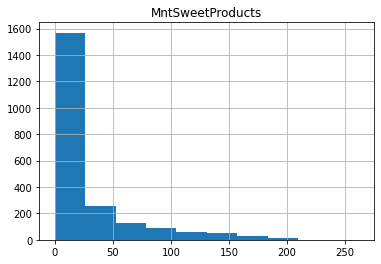

In [ ]:
##MntSweetProducts
data.hist(column='MntSweetProducts')

#### spending on sweets upto 25

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fa56ccbd0>]],
      dtype=object)

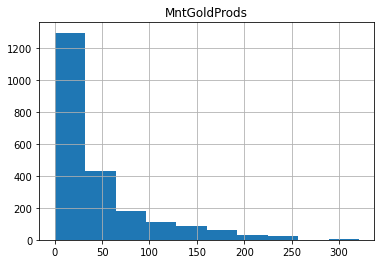

In [ ]:
##MntGoldProds
data.hist(column='MntGoldProds')

#### amount spent on gold is about 25 by most customers

In [ ]:
data.NumDealsPurchases.unique()

array([ 3,  2,  1,  5,  4, 15,  7,  6,  9,  0,  8, 10, 13, 11, 12])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fa5234c50>]],
      dtype=object)

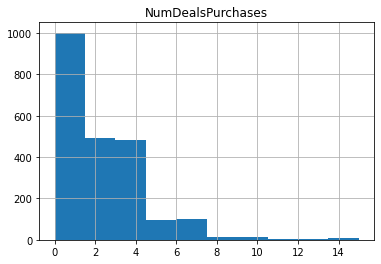

In [ ]:
## NumDealsPurchases
data.hist(column='NumDealsPurchases')

##### upto 4 products are bought through company's website

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fa51c35d0>]],
      dtype=object)

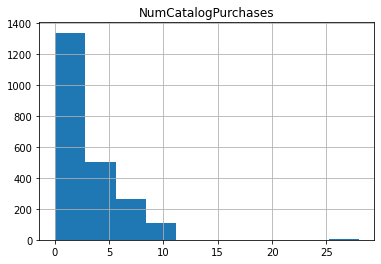

In [ ]:
## NumCatalogPurchases
data.hist(column='NumCatalogPurchases')

##### upto 5 products bought through catalogue

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fa5154350>]],
      dtype=object)

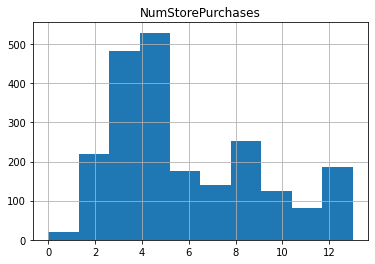

In [ ]:
## NumStorePurchases
data.hist(column='NumStorePurchases')

##### mostly bought through stores

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fa5067ad0>]],
      dtype=object)

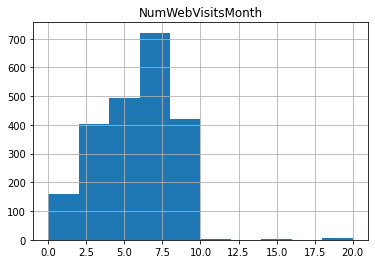

In [ ]:
## NumWebVisitsMonth
data.hist(column='NumWebVisitsMonth')

In [ ]:
data.NumWebVisitsMonth.unique()

array([ 7,  5,  4,  6,  8,  9, 20,  2,  3,  1, 10,  0, 14, 19, 17, 13])

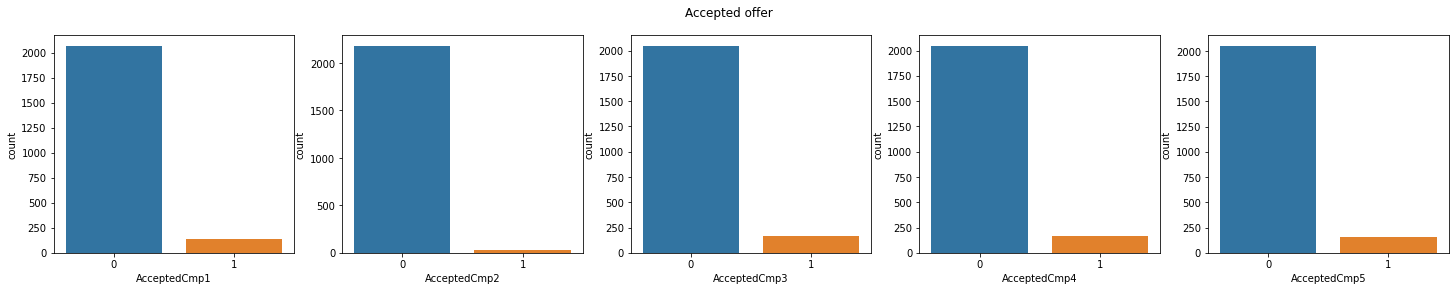

In [ ]:
fig, axes = plt.subplots(1,5, figsize=(25,4))
fig.suptitle('Accepted offer')
sns.countplot(ax=axes[0], x='AcceptedCmp1',data=data)
sns.countplot(ax=axes[1], x='AcceptedCmp2',data=data)
sns.countplot(ax=axes[2], x='AcceptedCmp3',data=data)
sns.countplot(ax=axes[3], x='AcceptedCmp4' ,data=data)
sns.countplot(ax=axes[4], x='AcceptedCmp5',data=data)

##### for AcceptedCmp2 accepted is slightly less when compared to other Acceptedcmps
##### Remaining have same distribution

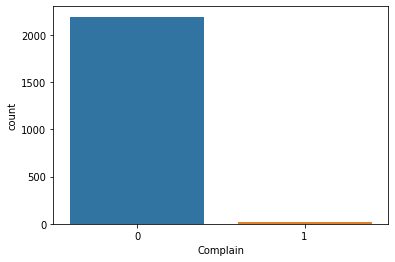

In [ ]:
sns.countplot(x='Complain',data=data)

##### less complains received

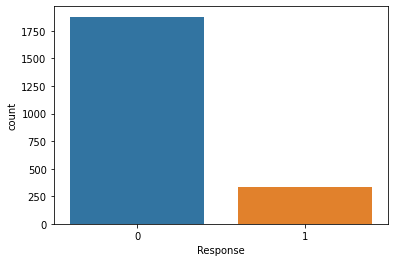

In [ ]:
## Response
sns.countplot(x='Response',data=data)

###### last campaign above 250 customers accepted the offer in last campaign

In [ ]:
data = data.drop(['Year_Birth','Dt_Customer'],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Education                 2212 non-null   int64  
 1   Marital_Status            2212 non-null   int64  
 2   Income                    2212 non-null   float64
 3   Kidhome                   2212 non-null   int64  
 4   Teenhome                  2212 non-null   int64  
 5   Recency                   2212 non-null   int64  
 6   MntWines                  2212 non-null   int64  
 7   MntFruits                 2212 non-null   int64  
 8   MntMeatProducts           2212 non-null   int64  
 9   MntFishProducts           2212 non-null   int64  
 10  MntSweetProducts          2212 non-null   int64  
 11  MntGoldProds              2212 non-null   int64  
 12  NumDealsPurchases         2212 non-null   int64  
 13  NumWebPurchases           2212 non-null   int64  
 14  NumCatal

In [ ]:
## X matrix
X = data.iloc[:,:]

In [ ]:
## Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


##### **Dimensionality Reduction using PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X1 = pca.fit_transform(X)

##### **Clustering of custmers using KMeans algorithm**

In [ ]:
## Importing Kmeans
from sklearn.cluster import KMeans

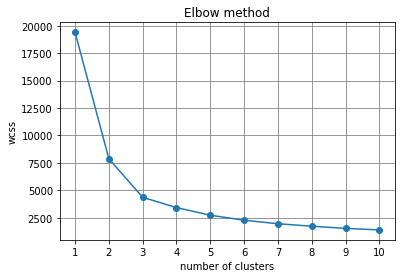

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
wcss = [] # with in cluster sum of squares(wcss)
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state= 42)
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss, marker = 'o')
plt.xticks(range(1,11,1))
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.title('Elbow method')
plt.grid(True, color = 'grey')
plt.show()

##### Number of clusters ==> 3

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state= 42)
y_kmeans = kmeans.fit_predict(X1)

In [ ]:
print(y_kmeans)

[0 1 2 ... 2 2 1]


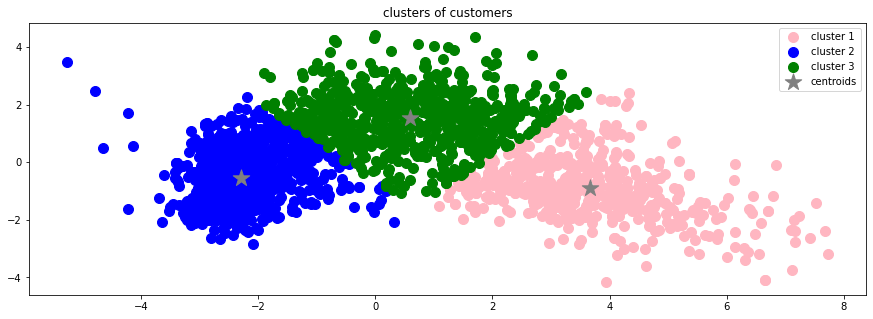

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(X1[y_kmeans == 0, 0],X1[y_kmeans == 0, 1], s = 100, color = 'lightpink', label = 'cluster 1' ) 
plt.scatter(X1[y_kmeans == 1, 0],X1[y_kmeans == 1, 1], s = 100, color = 'blue', label = 'cluster 2' ) 
plt.scatter(X1[y_kmeans == 2, 0],X1[y_kmeans == 2, 1], s = 100, color = 'green', label = 'cluster 3' ) 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'grey', label = 'centroids', marker = '*')
plt.title('clusters of customers')
plt.legend()
plt.show() 

In [ ]:
data['clusters'] = y_kmeans

In [ ]:
print(len(data[y_kmeans==0]))

530


In [ ]:
print(len(data[y_kmeans==1]))

1014


In [ ]:
print(len(data[y_kmeans==2]))

668


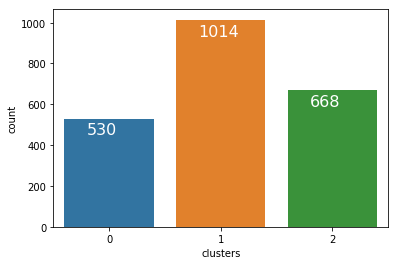

In [ ]:
## count of customers in each cluster
ax=sns.countplot(x=data['clusters'], data=data);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='center_baseline', color='white', size=16)

##### cluster 0: contains 530 customers
##### cluster 1: contains 1014 customers
##### cluster 2: contains 668 customers

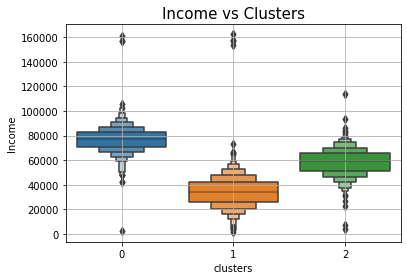

In [ ]:
## income details of each cluster
#plt.figure(figsize = (12,8))
sns.boxenplot(x = data["clusters"], y = data["Income"])
plt.title("Income vs Clusters", size = 15)
plt.grid(True)
plt.show()

###### median salary of cluster 0 is 60,000
###### median salary of cluster 1 is 40,000, some have income around 1,60,000
###### median salary of cluster 2 is 80,000, some have income around 1,60,000

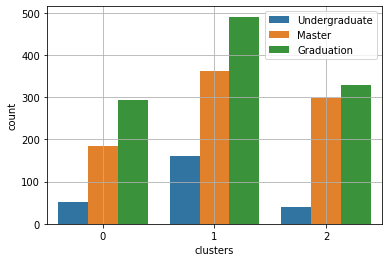

In [ ]:
## education details of customers in each cluster
g = sns.countplot(x='clusters',data=data,hue='Education')
plt.legend(labels=['Undergraduate','Master','Graduation'])
plt.grid(True)

###### cluster 0 : undergraguates are very less while graduates and masters are almost same
###### cluster 1 : undergraguates are around 180, masters are 350 and graduates are 490
###### cluster 2 : undergraduates are less than 100, masters are 190 and graduates are nearer to 300

###### in all clusters graduates are more

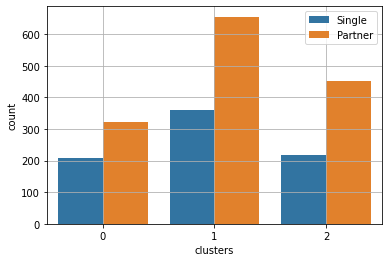

In [ ]:
## Marital_status of customers in each cluster
g = sns.countplot(x='clusters',data=data,hue='Marital_Status')
plt.legend(labels=['Single','Partner'])
plt.grid(True)

##### In all clusters customers staying with their partner are more
##### **cluster 1** has more customers staying with their partner.


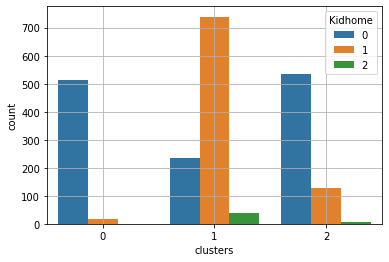

In [ ]:
## details of kids in each cluster
g = sns.countplot(x='clusters',data=data,hue='Kidhome')
plt.grid(True)

##### **cluster 0 :** about 510 customers are with no kids and very less customers with 
##### one kid at home
##### **cluster 1**: above 700 customers are with one kid at home, 210 customers are with no kid at home,  around 20 customers are with 2 kids at home
##### **cluster 2**: 110 customers are with one kids, 520 customers are with no kids at home, almost 10 customers are with 2 kids 


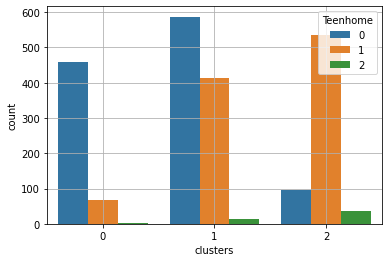

In [ ]:
## details of teens at home
g = sns.countplot(x='clusters',data=data,hue='Teenhome')
plt.grid(True)

##### **cluster 0**: around 570 customers are with no teens at home, less than 100 customers are with 1 teen at home, less than 10 customers are with 2 teens at home.
##### **cluster 1**: around 590 customers are with no teens at home, around 410 customers are with 1 teen at home, around 10 customers have 2 teens at home
##### **cluster 2** : around 520 customers are 1 teen at home, 100 customers are with no teen at home, around 30 customers are with 2 teens.

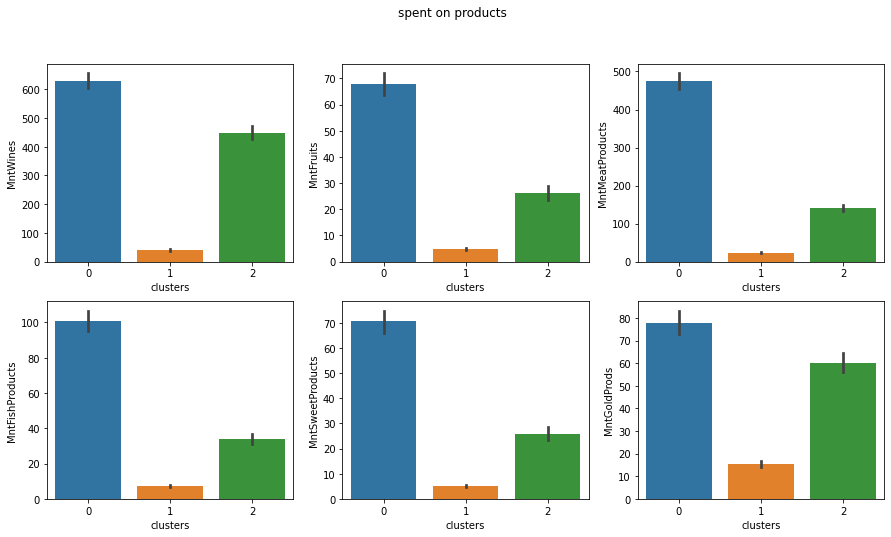

In [ ]:
## customers spending on products
fig, axes = plt.subplots(2,3, figsize=(15,8))
fig.suptitle('spent on products')
sns.barplot(ax=axes[0,0],x='clusters', y='MntWines',data=data)
sns.barplot(ax=axes[0,1],x='clusters', y='MntFruits',data=data)
sns.barplot(ax=axes[0,2],x='clusters', y='MntMeatProducts',data=data)
sns.barplot(ax=axes[1,0],x='clusters', y='MntFishProducts' ,data=data)
sns.barplot(ax=axes[1,1],x='clusters', y='MntSweetProducts',data=data)
sns.barplot(ax=axes[1,2],x='clusters' ,y='MntGoldProds',data=data)

#### **cluster 0:** spent more on wines, fruits, meat, fish, sweets, gold products
#### **cluster 1**: spent very very less on products
#### **cluster 2:** spent more on wines and gold while average spent on remaining products

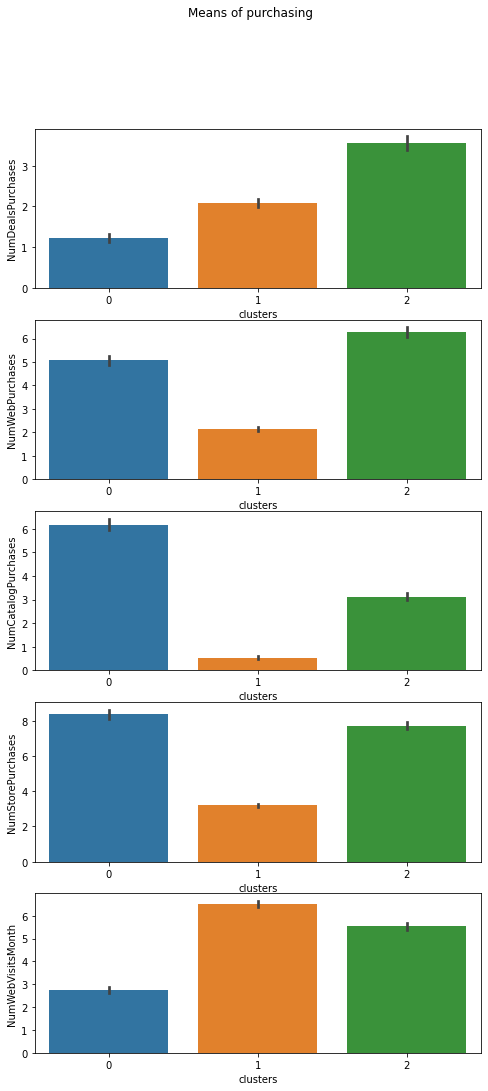

In [ ]:
fig, axes = plt.subplots(5, figsize=(8,17))
fig.suptitle('Means of purchasing')
sns.barplot(ax=axes[0],x='clusters', y='NumDealsPurchases',data=data)
sns.barplot(ax=axes[1],x='clusters', y='NumWebPurchases',data=data)
sns.barplot(ax=axes[2],x='clusters', y='NumCatalogPurchases',data=data)
sns.barplot(ax=axes[3],x='clusters', y='NumStorePurchases' ,data=data)
sns.barplot(ax=axes[4],x='clusters', y='NumWebVisitsMonth',data=data)

##### **cluster 0**: through web catalogue, store
##### **cluster 1**: visited company's website, averagely bought products with discount
##### **cluster 2**: actively bought products with discount sale, through store, through website, visited company,s website actively, averagely bought through catalogue. 

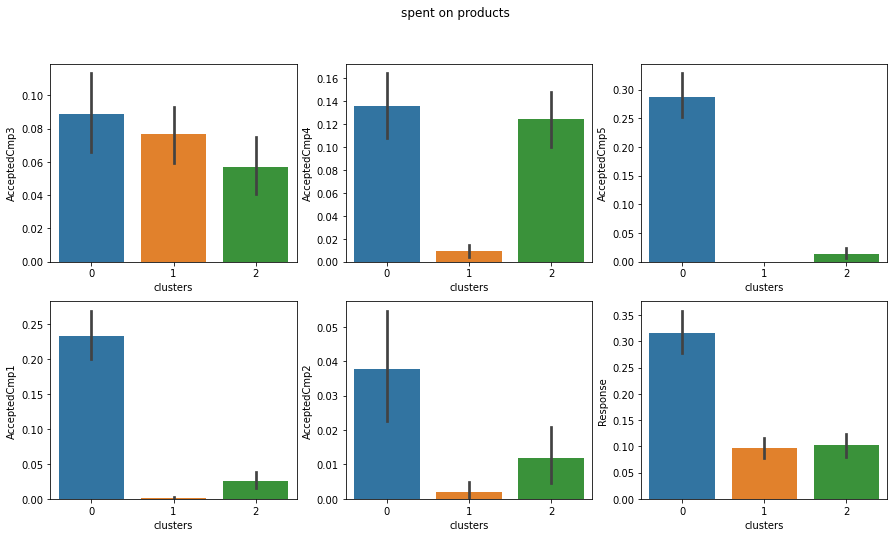

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(15,8))
fig.suptitle('customers accepted offers during campaign')
sns.barplot(ax=axes[0,0],x='clusters', y='AcceptedCmp3',data=data)
sns.barplot(ax=axes[0,1],x='clusters', y='AcceptedCmp4',data=data)
sns.barplot(ax=axes[0,2],x='clusters', y='AcceptedCmp5',data=data)
sns.barplot(ax=axes[1,0],x='clusters', y='AcceptedCmp1' ,data=data)
sns.barplot(ax=axes[1,1],x='clusters', y='AcceptedCmp2',data=data)
sns.barplot(ax=axes[1,2],x='clusters' ,y='Response',data=data)

##### **In First campaign** customers of **cluster 0** accepted the offer actively
##### **In second campaign** customers of **cluster 0** accepted the offer actively
##### **In third campaign** the order of clusters who accepted the offer : **cluster 0 > cluster 1 > cluster 2**
##### **In fourth campaign** customers of **cluster 0 and cluster 2** accepted the offer
##### **In fifth campaign** customers of **cluster 0** accepted the offer
##### **In last campaign** customers of **cluster 0** accepted the offer

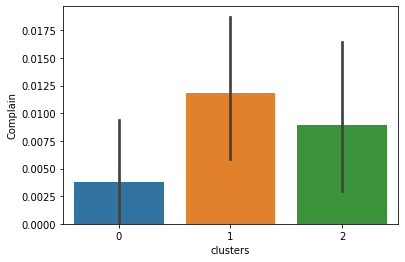

In [ ]:
## complains by customers
sns.barplot(x='clusters',y='Complain',data=data)

##### order of clusters of customers complain:
##### **cluster 1 > cluster 2 > cluster 0**

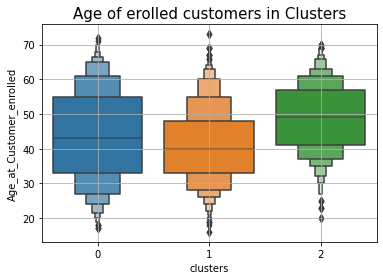

In [ ]:
sns.boxenplot(x = data["clusters"], y = data["Age_at_Customer_enrolled"])
plt.title("Age of erolled customers in Clusters", size = 15)
plt.grid(True)
plt.show()

#### cluster 0: median age ==> 42
#### cluster 1: median age ==> 40
#### cluster 2: median age ==> 50

In [ ]:
df1 = data[data['clusters']==0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f9ecb35d0>]],
      dtype=object)

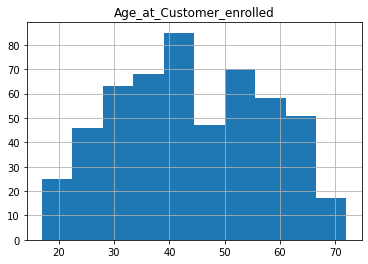

In [ ]:
df1.hist(column='Age_at_Customer_enrolled')

##### cluster 0: all age catogories are present

In [ ]:
df2 = data[data['clusters']==1]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f9ec77e90>]],
      dtype=object)

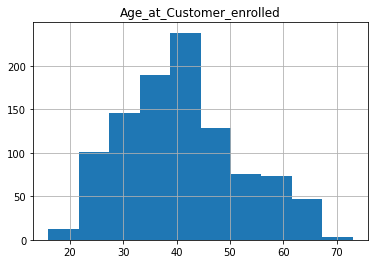

In [ ]:
df2.hist(column='Age_at_Customer_enrolled')

##### cluster 1: 35 - 45 customers are more in number

In [ ]:
df3 = data[data['clusters']==2]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f9e2753d0>]],
      dtype=object)

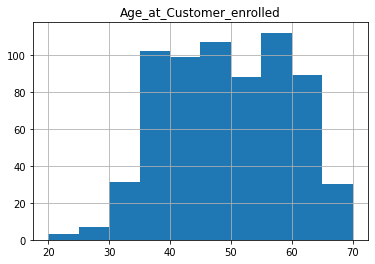

In [ ]:
df3.hist(column='Age_at_Customer_enrolled')

#### cluster 2 : 35 - 65 age customers are more in number

#### **Profiling the customers**
#### **Cluster 0:**

* size : 530
* median income : 60,000  
* constitutes graduates, masters, undergraduates(less)  
* contains both living withpartner and single
* no kids, no teens
* spent more on wines, fruits, meat, fish, sweets, gold products
* buying medium : through web catalogue, store
* actively accepted the offers in all campaigns
* all age catogories are present

#### **Cluster 1:**
* size = 1014
* median income : 40,000, some are with 1,60,000
* constitutes more of masters and graduates 
* living with partner are more than single
* more with one kid and some with two kids and with teens
* spent very very less on products
* visited company's website, averagely bought products with discount 
* not actively accepted the in the offer in campaigh
* median age : 40


#### **Cluster 2:**
* size = 668
* median income : 80,000 , some with 1,60,000
* constitutes more of graduates and masters
* more are living with partner than single
* more are with one teens
* spent more on wines and gold while average spent on remaining products
*  actively bought products with discount sale, through store, through website, visited company,s website actively, averagely bought through catalogue.
* less actively accepted the offers in campaigns
* median age 50

















